# CSC3831 Final Assessment - Part I: Data Engineering



In [47]:
# Loading in standard packages for analysis, feel free to add an extra packages you'd like to use here
import random
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Loading in the corrupted dataset to be used in analysis and imputation
houses_corrupted = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/CORRUPTED/HOUSES/houses_0.1_MAR.csv', header=0)
# Remove an artifact from the dataset
houses_corrupted.drop(["Unnamed: 0"], axis=1, inplace=True)

Above we've loaded in a corrupted version of a housing dataset. The anomalies need to be dealt with and missing values imputed.

### 1. Data Understanding [7]
- Perform ad hoc EDA to understand and describe what you see in the raw dataset
  - Include graphs, statistics, and written descritpions as appropriate
  - Any extra information about the data you can provide here is useful, think about performing an analysis (ED**A**), what would you find interesting or useful?
- Identify features with missing records, outlier records


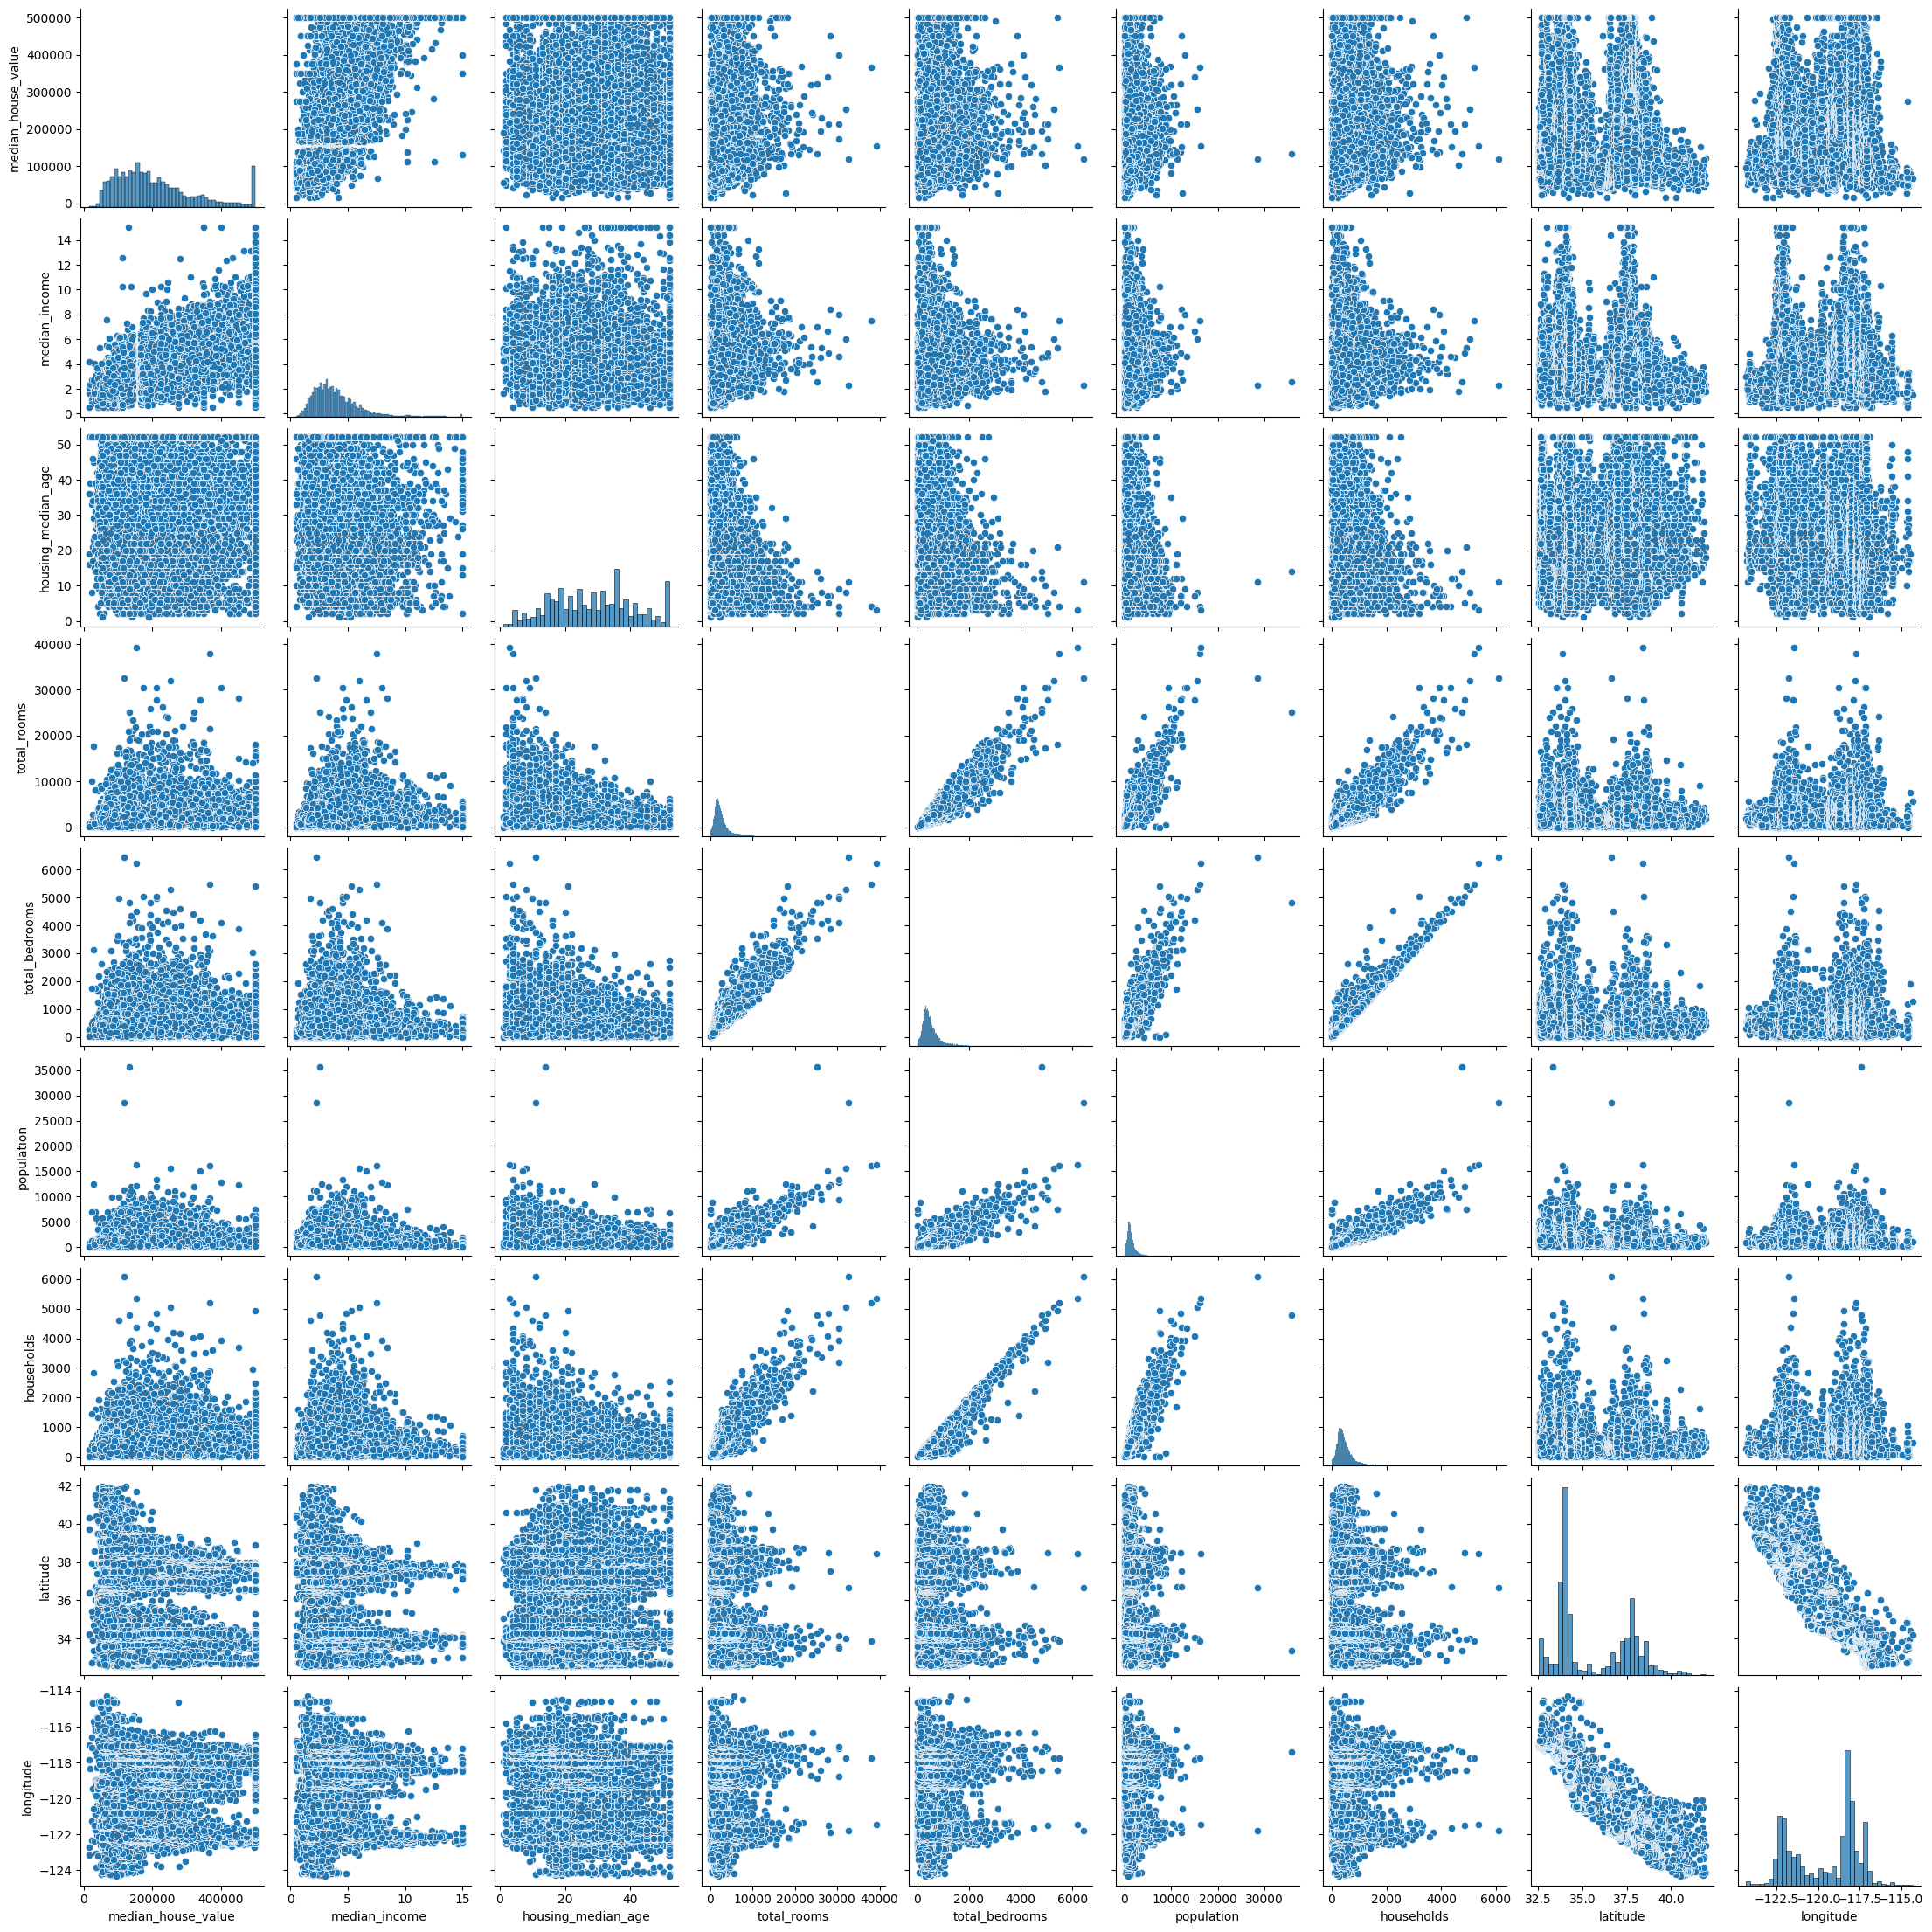

In [ ]:
sns.pairplot(houses_corrupted)

In [ ]:
houses_corrupted.describe()

median_house_value  median_income  housing_median_age   total_rooms  \
count        20640.000000   18576.000000        18576.000000  20640.000000   
mean        206855.816909       3.929958           28.324182   2635.763081   
std         115395.615874       1.964296           12.584914   2181.615252   
min          14999.000000       0.499900            1.000000      2.000000   
25%         119600.000000       2.560300           18.000000   1447.750000   
50%         179700.000000       3.572400           28.000000   2127.000000   
75%         264725.000000       4.870050           37.000000   3148.000000   
max         500001.000000      15.000100           52.000000  39320.000000   

       total_bedrooms    population    households      latitude     longitude  
count    20640.000000  18576.000000  20640.000000  20640.000000  20640.000000  
mean       537.898014   1488.069283    499.539680     35.631861   -119.569704  
std        421.247906   1170.585810    382.329753      2.135952      2.003532  
min          1.000000      3.000000      1.000000     32.540000   -124.350000  
25%        295.000000    839.000000    280.000000     33.930000   -121.800000  
50%        435.000000   1227.000000    409.000000     34.260000   -118.490000  
75%        647.000000   1803.000000    605.000000     37.710000   -118.010000  
max       6445.000000  35682.000000   6082.000000     41.950000   -114.310000

<Axes: xlabel='median_house_value', ylabel='Density'>

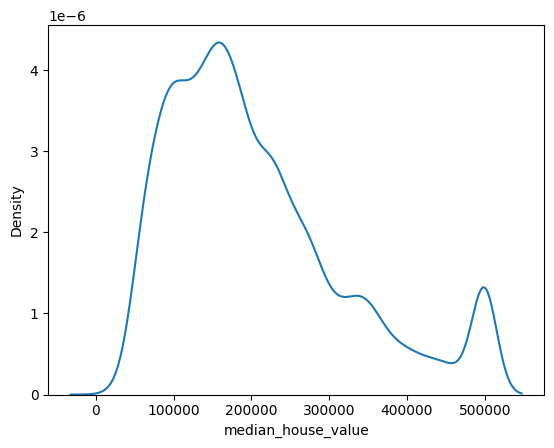

In [ ]:
sns.kdeplot(houses_corrupted['median_house_value'])

<Axes: ylabel='median_house_value'>

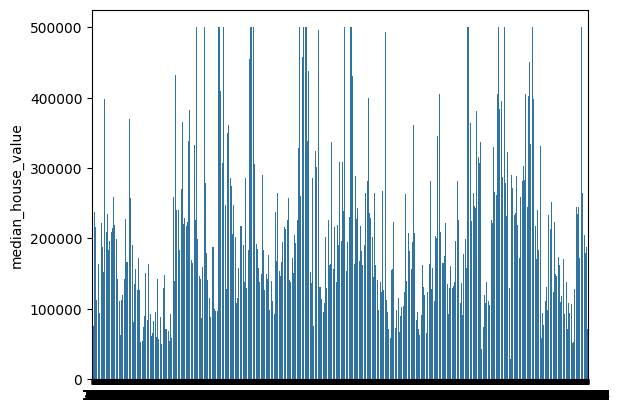

In [ ]:
sns.barplot(houses_corrupted['median_house_value'])

The median house value is positively skewed which mean that the mean value of the houses will be greater than the median. It also mean that there are far more houses with a lesser value than there are houses with a greater value.
the median house value is 179,700 and the mean house value is 206,855 according to the describe() function.

<Axes: xlabel='median_income', ylabel='Density'>

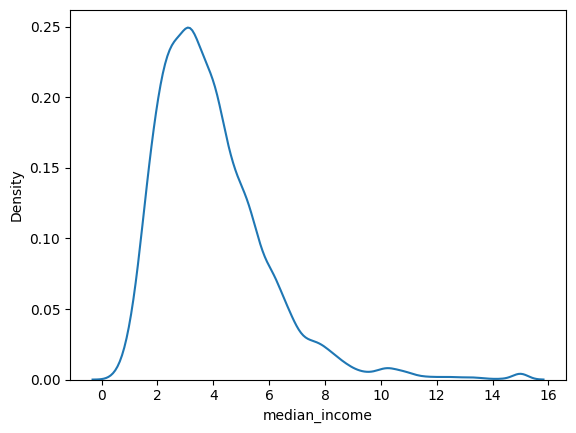

In [ ]:
sns.kdeplot(houses_corrupted['median_income'])

In [ ]:
houses_corrupted_MAD = pd.DataFrame(columns = houses_corrupted.columns[:-1])
mads = []
for attribute in houses_corrupted.columns[:-1]:
  mad = 1.483 * abs(houses_corrupted[attribute] - houses_corrupted[attribute].median()).median()
  mads.append(mad)
houses_corrupted_MAD.loc[0] = mads
print(houses_corrupted_MAD)

   median_house_value  median_income  housing_median_age  total_rooms  \
0            101437.2       1.660515              13.347     1181.951   

   total_bedrooms  population  households  latitude  
0         241.729     670.316     223.933   1.82409  


Similarly to the median house value we can clearly see that the median income is positively skewed which concludes that for our dataset the mean income is greater than the median. There are far fewer people that find themselves on the richer side of the median than on the poorer side. Using the descibe() feature we know that the mean income is 3.92, and that the median income is slightly lesser at 3.57.

<Axes: xlabel='housing_median_age', ylabel='Density'>

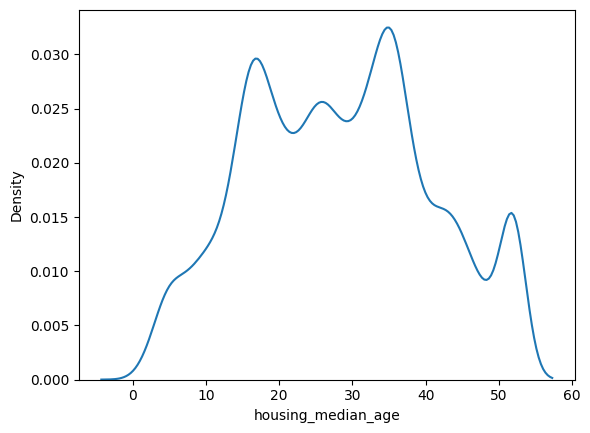

In [ ]:
sns.kdeplot(houses_corrupted['housing_median_age'])

The house median age is slightly positively skewed due to the median being 28 and the mean age being 28,3 years. Other than that we can see that there are few house owners in the 0-10 age span and most house owners are between 30-40 years of age. There is a slightly higher concentration of 50 year old than mid 40s. Finally according to the describe() function the oldest house owner is 52 years old. Due to the mean and median being so close togther this attribute is the closest to a true normalized graph.

<Axes: xlabel='total_rooms', ylabel='Density'>

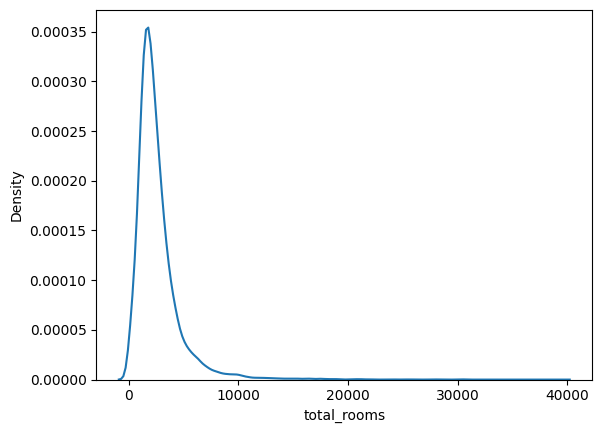

In [ ]:
sns.kdeplot(houses_corrupted['total_rooms'])

<Axes: xlabel='total_bedrooms', ylabel='Density'>

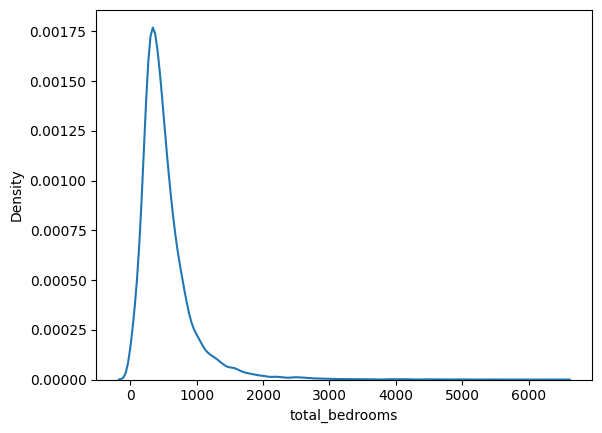

In [ ]:
sns.kdeplot(houses_corrupted['total_bedrooms'])

<Axes: xlabel='population', ylabel='Density'>

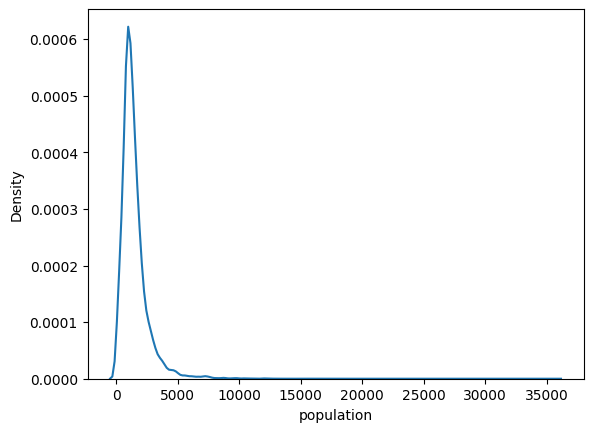

In [ ]:
sns.kdeplot(houses_corrupted['population'])

<Axes: xlabel='households', ylabel='Density'>

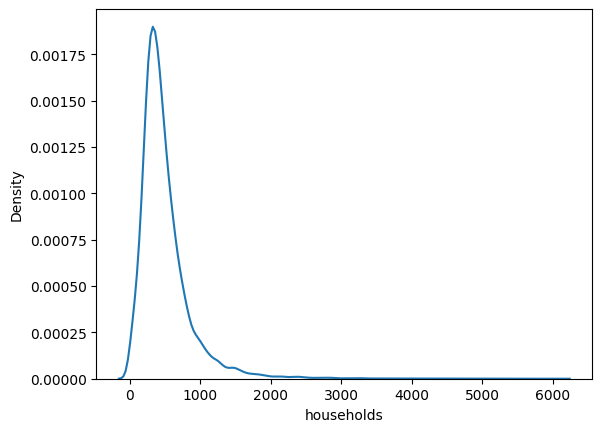

In [ ]:
sns.kdeplot(houses_corrupted['households'])

<Axes: xlabel='latitude', ylabel='Density'>

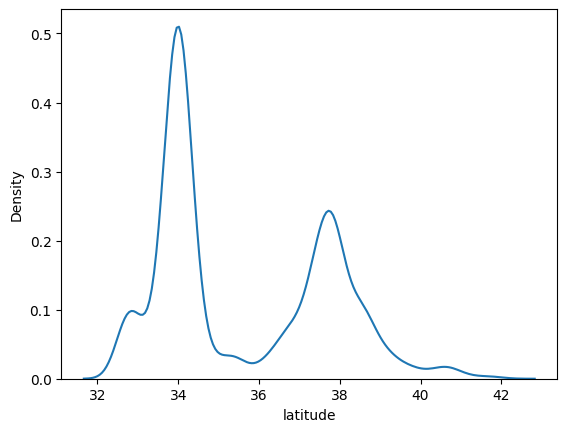

In [ ]:
sns.kdeplot(houses_corrupted['latitude'])

<Axes: xlabel='longitude', ylabel='Density'>

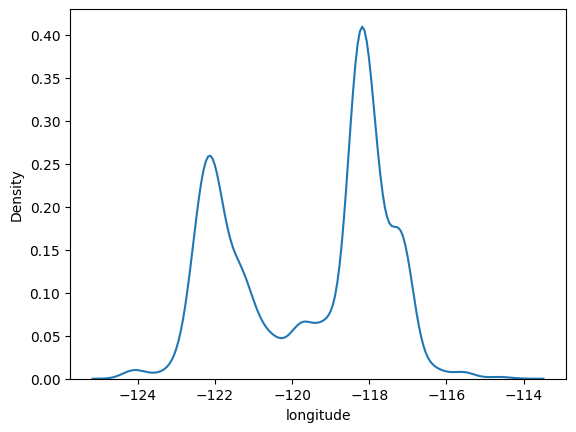

In [ ]:
sns.kdeplot(houses_corrupted['longitude'])

The KDE plots of both the latitude and longitude shows us the coordinates for the houses in our dataset and we can see that the majority of houses are located at either 34° or 38° with a strong majority in 34°. Similarly the longitudal axis have two major coordinates at -122° and -118° with the strong majority in -118°.

The most popular coordinates (34°, -118°) are in Los Angeles and the lesser popular (38°, -122°) are just outside San Fransisco.

In [ ]:
houses_corrupted.head(10)

median_house_value  median_income  housing_median_age  total_rooms  \
0            452600.0         8.3252                41.0        880.0   
1            358500.0         8.3014                21.0       7099.0   
2            352100.0         7.2574                52.0       1467.0   
3            341300.0         5.6431                52.0       1274.0   
4            342200.0         3.8462                52.0       1627.0   
5            269700.0         4.0368                52.0        919.0   
6            299200.0         3.6591                52.0       2535.0   
7            241400.0         3.1200                52.0       3104.0   
8            226700.0         2.0804                42.0       2555.0   
9            261100.0         3.6912                52.0       3549.0   

   total_bedrooms  population  households  latitude  longitude  
0           129.0       322.0       126.0     37.88    -122.23  
1          1106.0      2401.0      1138.0     37.86    -122.22  
2           190.0         NaN       177.0     37.85    -122.24  
3           235.0         NaN       219.0     37.85    -122.25  
4           280.0       565.0       259.0     37.85    -122.25  
5           213.0       413.0       193.0     37.85    -122.25  
6           489.0      1094.0       514.0     37.84    -122.25  
7           687.0      1157.0       647.0     37.84    -122.25  
8           665.0      1206.0       595.0     37.84    -122.26  
9           707.0      1551.0       714.0     37.84    -122.25

In [ ]:
houses_corrupted.corr()

median_house_value  median_income  housing_median_age  \
median_house_value            1.000000       0.694887            0.097929   
median_income                 0.694887       1.000000           -0.120147   
housing_median_age            0.097929      -0.120147            1.000000   
total_rooms                   0.134153       0.198818           -0.372323   
total_bedrooms                0.050594      -0.009499           -0.329757   
population                   -0.027855       0.006298           -0.305052   
households                    0.065843       0.012754           -0.312948   
latitude                     -0.144160      -0.096861            0.011372   
longitude                    -0.045967      -0.008902           -0.106438   

                    total_rooms  total_bedrooms  population  households  \
median_house_value     0.134153        0.050594   -0.027855    0.065843   
median_income          0.198818       -0.009499    0.006298    0.012754   
housing_median_age    -0.372323       -0.329757   -0.305052   -0.312948   
total_rooms            1.000000        0.929893    0.857515    0.918484   
total_bedrooms         0.929893        1.000000    0.877178    0.979829   
population             0.857515        0.877178    1.000000    0.907096   
households             0.918484        0.979829    0.907096    1.000000   
latitude              -0.036100       -0.066318   -0.107525   -0.071035   
longitude              0.044568        0.068378    0.099797    0.055310   

                    latitude  longitude  
median_house_value -0.144160  -0.045967  
median_income      -0.096861  -0.008902  
housing_median_age  0.011372  -0.106438  
total_rooms        -0.036100   0.044568  
total_bedrooms     -0.066318   0.068378  
population         -0.107525   0.099797  
households         -0.071035   0.055310  
latitude            1.000000  -0.924664  
longitude          -0.924664   1.000000

From the correlations between the attributes we can conclude that attributes which share a unit of measurement share a high correlation. For example: the median house value and median income both use a unit for money, and therefore share a high correlation. Similar both the latitude and longitude share a unit of degrees (°) which also gives them a strong correlation. The housing median age which have the unit of years share no unit with other attributes and therefore have low correlation with the other attributes.

### 2. Outlier Identification [10]
- Utilise a statistical outlier detection approach (i.e., **no** KNN, LOF, 1Class SVM)
- Utilise an algorithmic outlier detection method of your choice
- Compare results and decide what to do with identified outleirs
  - Include graphs, statistics, and written descriptions as appropriate
- Explain what you are doing, and why your analysis is appropriate
- Comment on benefits/detriments of statistical and algorithmic outlier detection approaches


In [26]:
houses_corrupted_outliers = houses_corrupted.dropna()


I am using isolation forest method for my algorithmic approach and it cannot process missing data, so first we must remove all rows with empty data.

Total data points: 15059
Outliers detected by Robust Z-Score: 1887 (12.53%)
Outliers detected by Isolation Forest: 753 (5.00%)
Outliers detected by both methods: 697 (4.63%)
Total unique outliers detected (any method): 1943 (12.90%)
Total outliers detected (both methods): 2640 (17.53%)


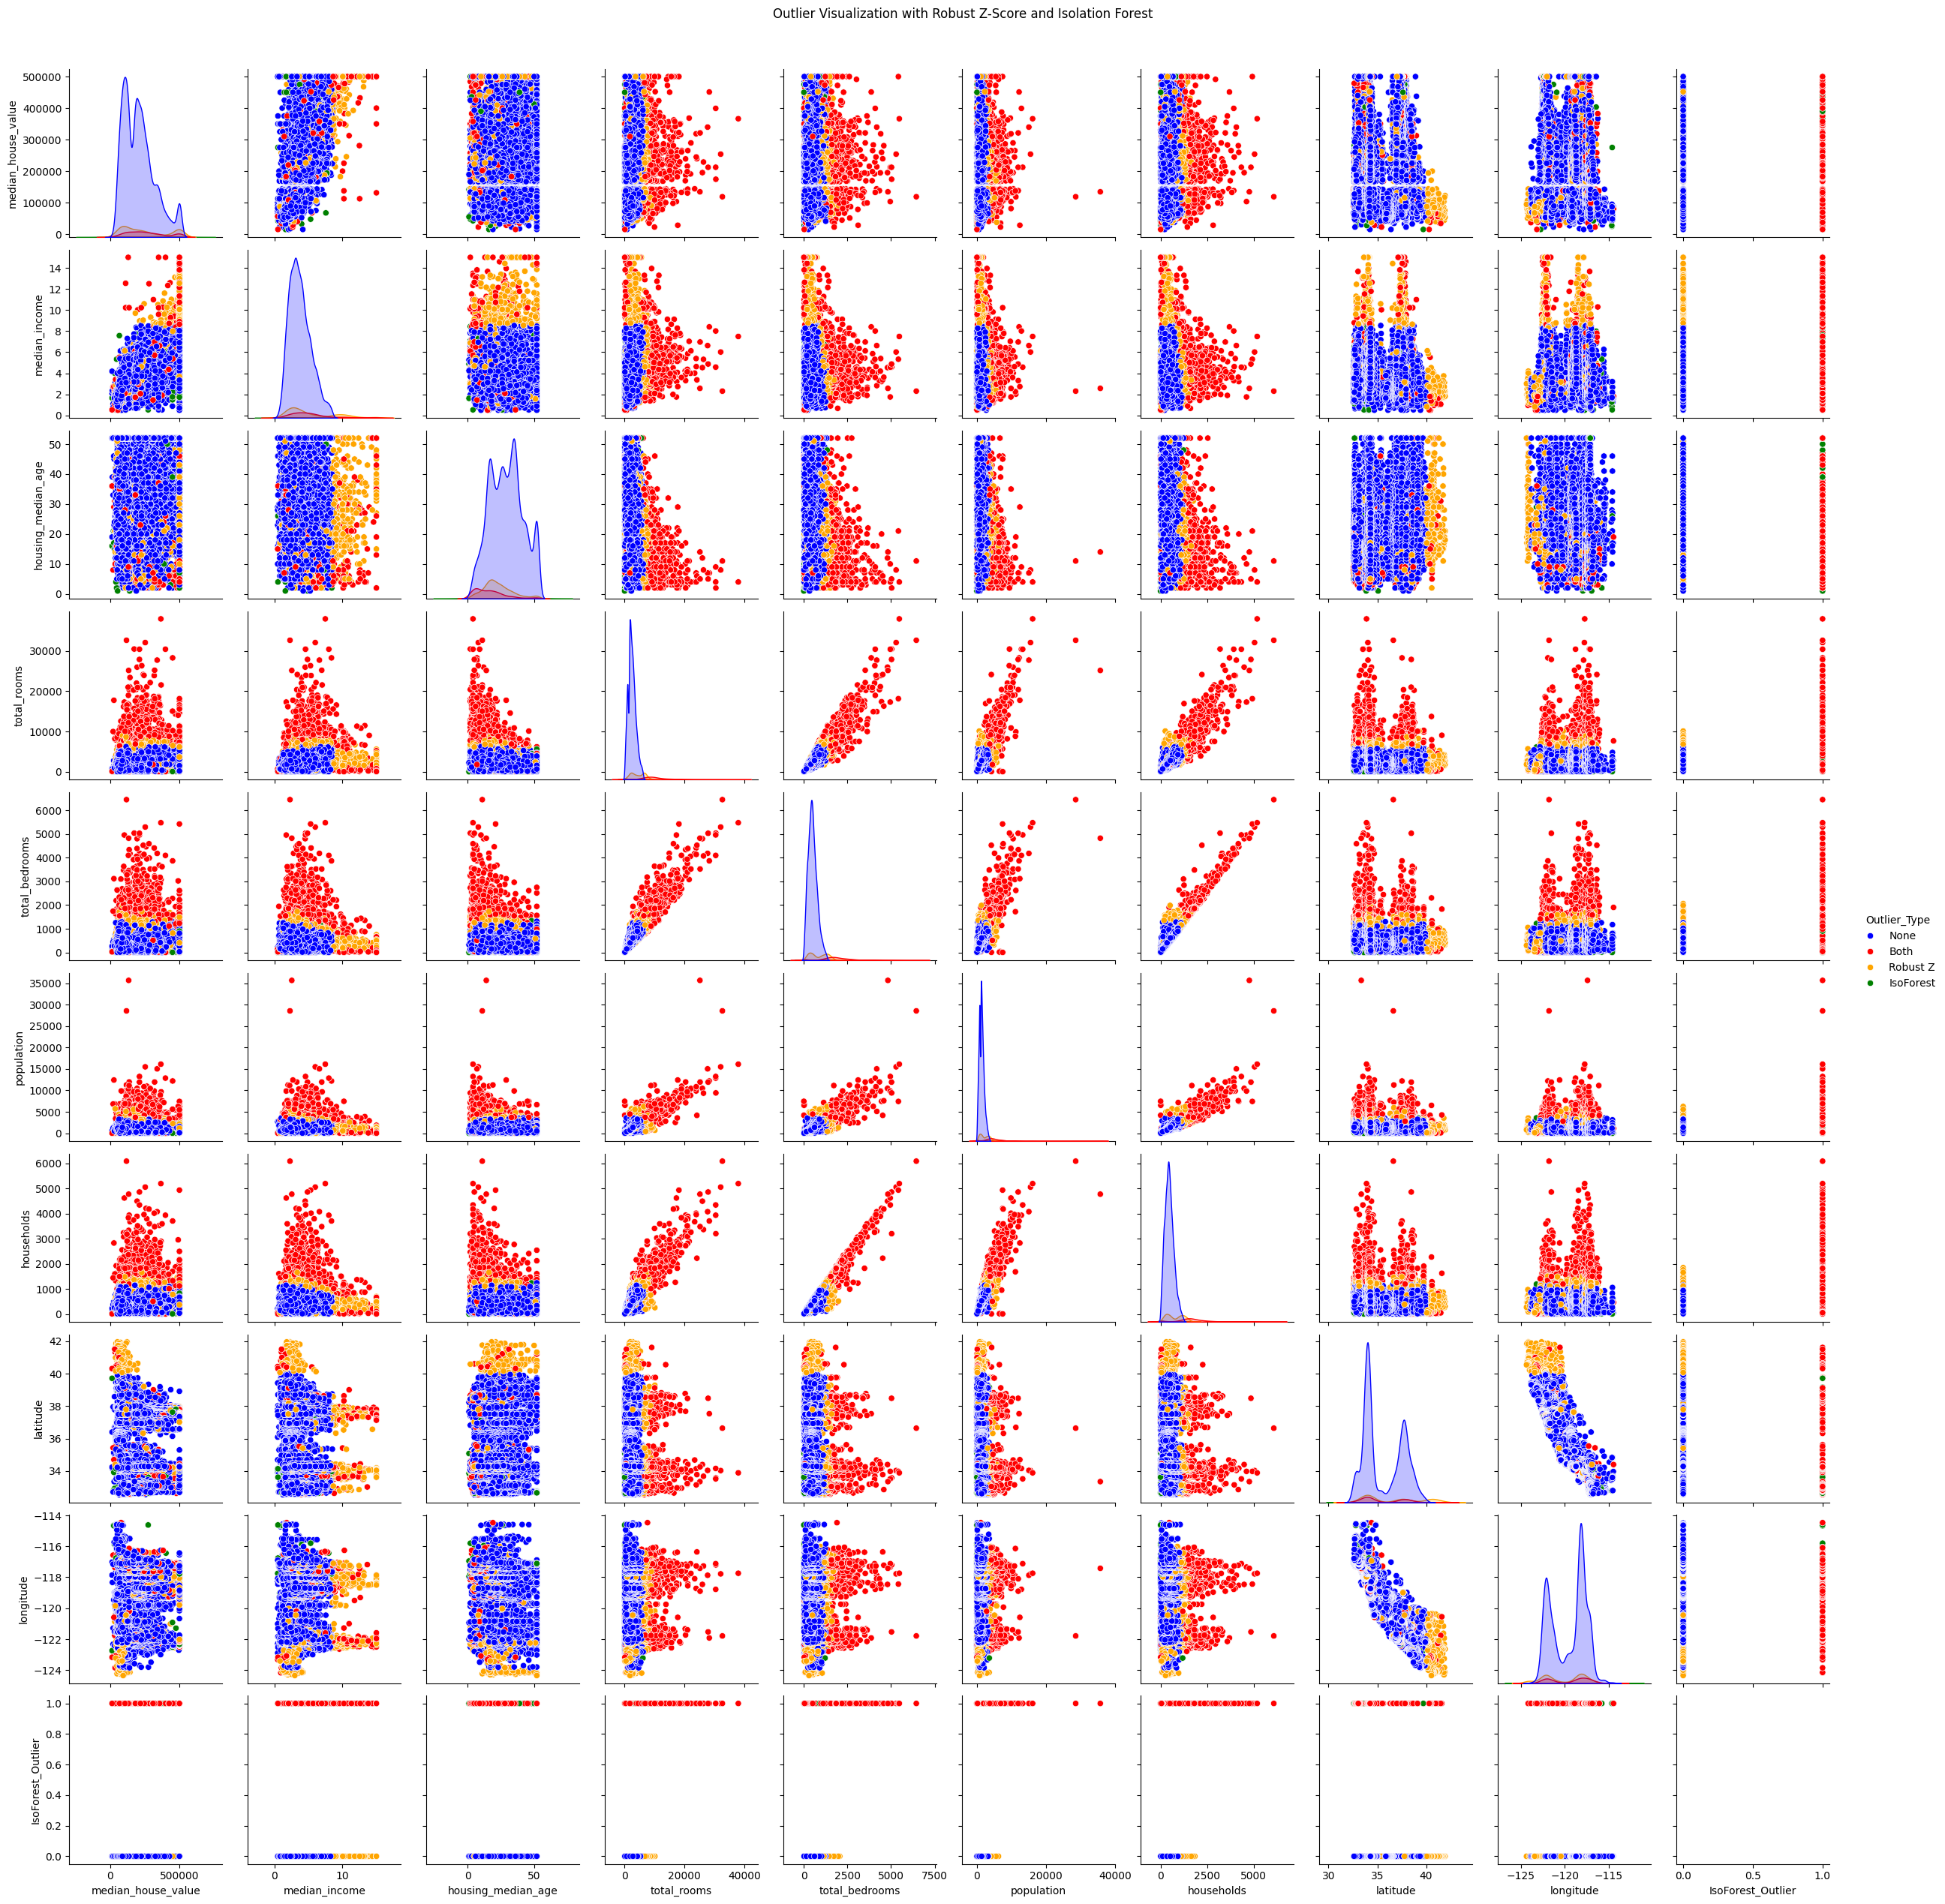

In [24]:
#Robust Z-Score method

threshold = 3
tmp = houses_corrupted_outliers.copy()
tmp['Robust_Z_Outlier'] = 0

for col in houses_corrupted_outliers.select_dtypes(include=[np.number]).columns:
    median = houses_corrupted_outliers[col].median()
    mad = np.median(np.abs(houses_corrupted_outliers[col] - median))
    if mad == 0:
        continue
    robust_z_scores = (houses_corrupted_outliers[col] - median) / (1.4826 * mad)
    tmp['Robust_Z_Outlier'] |= np.abs(robust_z_scores) > threshold

houses_corrupted_outliers = tmp

#Isolation forest method
iso_forest = IsolationForest(contamination=0.05, random_state=42)
houses_corrupted_outliers['IsoForest_Outlier'] = iso_forest.fit_predict(houses_corrupted_outliers.select_dtypes(include=[np.number]))
houses_corrupted_outliers['IsoForest_Outlier'] = houses_corrupted_outliers['IsoForest_Outlier'].apply(lambda x: 1 if x == -1 else 0)
houses_corrupted_outliers['Combined_Outlier'] = houses_corrupted_outliers['Robust_Z_Outlier'] & houses_corrupted_outliers['IsoForest_Outlier']
houses_corrupted_outliers['Total_Outlier'] = houses_corrupted_outliers[['Robust_Z_Outlier', 'IsoForest_Outlier']].any(axis=1)


def classify_outlier(row):
    if row['Robust_Z_Outlier'] and row['IsoForest_Outlier']:
        return 'Both'
    elif row['Robust_Z_Outlier']:
        return 'Robust Z'
    elif row['IsoForest_Outlier']:
        return 'IsoForest'
    else:
        return 'None'

#Organize data
houses_corrupted_outliers['Outlier_Type'] = houses_corrupted_outliers.apply(classify_outlier, axis=1)
total_points = len(houses_corrupted_outliers)
robust_z_outliers = houses_corrupted_outliers['Robust_Z_Outlier'].sum()
iso_forest_outliers = houses_corrupted_outliers['IsoForest_Outlier'].sum()
combined_outliers = houses_corrupted_outliers['Combined_Outlier'].sum()
total_outliers = houses_corrupted_outliers['Total_Outlier'].sum()

#Print result of outlier detection
print(f'Total data points: {total_points}')
print(f'Outliers detected by Robust Z-Score: {robust_z_outliers} ({robust_z_outliers/total_points:.2%})')
print(f'Outliers detected by Isolation Forest: {iso_forest_outliers} ({iso_forest_outliers/total_points:.2%})')
print(f'Outliers detected by both methods: {combined_outliers} ({combined_outliers/total_points:.2%})')
print(f'Total unique outliers detected (any method): {total_outliers} ({total_outliers/total_points:.2%})')
print(f'Total outliers detected (both methods): {robust_z_outliers + iso_forest_outliers} ({(robust_z_outliers + iso_forest_outliers)/total_points:.2%})')

#Plot a graph with all datapoints; coloured to show outlier type
sns.pairplot(
    data=houses_corrupted_outliers,
    vars=houses_corrupted_outliers.select_dtypes(include=[np.number]).columns,
    hue='Outlier_Type',
    palette={'None': 'blue', 'Robust Z': 'orange', 'IsoForest': 'green', 'Both': 'red'},
)

plt.suptitle('Outlier Visualization with Robust Z-Score and Isolation Forest', y=1.02)
plt.show()


Here we can see a pairplot of all datapoints with both methods of outlier detection. The blue dots are classified as not outliers; the orange dots are outliers which are exclusively found by the Robost Z-score method; the green dots are outliers exclusievly found by the Isolation forest method; finally the red dots are outliers which both methods managed to find. The printed data also shows that out of roughly 15,000 rows with data, there were a total of 2064 outliers (17.5%). And the Robust Z-scoring managed to identify more outliers with a total of 1887 outliers. Isolation forest managed to find 753 outliers.

Finally I decided not to remove any outliers because the next step is to impute the data and fill in the roughly 5581 missing datapoints. Imputing the data might resolve some of the outliers that due to the missing data have been miss-classified as outliers.

### 3. Imputation [10]
- Identify which features should be imputed and which should be removed
  - Provide a written rationale for this decision
- Impute the missing records using KNN imputation
- Impute the missing records using MICE imputation
- Compare both imputed datasets feature distributions against each other and the non-imputed data
- Build a regressor on all thre datasets
  - Use regression models to predict house median price
  - Compare regressors of non-imputed data against imputed datas
  - **Note**: If you're struggling to compare against the original dataset focus on comparing the two imputed datasets against each other


In [41]:
# Use this dataset for comparison against the imputed datasets
houses = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/ORIGINAL/houses.csv', header=0)
houses_corrupted.mean()

median_house_value    206855.816909
median_income              3.929958
housing_median_age        28.324182
total_rooms             2635.763081
total_bedrooms           537.898014
population              1488.069283
households               499.539680
latitude                  35.631861
longitude               -119.569704
dtype: float64

In [42]:
houses_corrupted.skew()

median_house_value    0.977763
median_income         1.587611
housing_median_age    0.085426
total_rooms           4.147343
total_bedrooms        3.453073
population            4.825861
households            3.410438
latitude              0.465953
longitude            -0.297801
dtype: float64

In [39]:
knn_imp = KNNImputer(n_neighbors = 5, weights = 'uniform')
knn_houses = pd.DataFrame(knn_imp.fit_transform(houses_corrupted), columns=houses_corrupted.columns)
knn_houses.mean()

median_house_value    206855.816909
median_income              3.866952
housing_median_age        28.670930
total_rooms             2635.763081
total_bedrooms           537.898014
population              1425.563750
households               499.539680
latitude                  35.631861
longitude               -119.569704
dtype: float64

In [40]:
knn_houses.skew()

median_house_value    0.977763
median_income         1.727736
housing_median_age    0.022480
total_rooms           4.147343
total_bedrooms        3.453073
population            4.995021
households            3.410438
latitude              0.465953
longitude            -0.297801
dtype: float64

In [45]:
mice_imp = IterativeImputer(max_iter=100 , random_state=0)
mice_houses = houses_corrupted.copy()
missing = mice_houses.isna()

imputed_vals = pd.DataFrame(mice_imp.fit_transform(mice_houses), columns=houses_corrupted.columns)
mice_houses[missing] = imputed_vals[missing]
mice_houses.mean()

median_house_value    206855.816909
median_income              3.861578
housing_median_age        28.480605
total_rooms             2635.763081
total_bedrooms           537.898014
population              1422.852007
households               499.539680
latitude                  35.631861
longitude               -119.569704
dtype: float64

In [46]:
mice_houses.skew()

median_house_value    0.977763
median_income         1.691750
housing_median_age    0.052175
total_rooms           4.147343
total_bedrooms        3.453073
population            4.970727
households            3.410438
latitude              0.465953
longitude            -0.297801
dtype: float64

We can clearly see that both the medians and the skew are quite similar for between the non-imputed dataset and the imputed data using both the KNN and MICE methods. So we can see that both methods performed almost equally, only differing slightly in the 10^-3 decimal space.

In [67]:
#Now to use regression on the different datasets.
regression = LinearRegression()

#Splitting each dataset into X and y axis
houses_corrupted_X = houses[[ 'median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude', 'longitude']]
houses_corrupted_y = houses[['median_house_value']]

knn_houses_X = knn_houses[[ 'median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude', 'longitude']]
knn_houses_y = knn_houses[['median_house_value']]

mice_houses_X = mice_houses[[ 'median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude', 'longitude']]
mice_houses_y = mice_houses[['median_house_value']]

#houses_corrupted
X_train, X_test, y_train, y_test = train_test_split(houses_corrupted_X, houses_corrupted_y, test_size = 0.3)
houses_corrupted_regression = regression.fit(X_train, y_train)
print('Non-imputed data:', houses_corrupted_regression.score(X_test, y_test))

#knn
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(knn_houses_X ,knn_houses_y, test_size = 0.3)
knn_houses_regression = regression.fit(X_train_knn, y_train_knn)
print('KNN imputed data:', knn_houses_regression.score(X_test_knn, y_test_knn))

#mice
X_train_mice, X_test_mice, y_train_mice, y_test_mice = train_test_split(mice_houses_X, mice_houses_y, test_size = 0.3)
mice_houses_regression = regression.fit(X_train_mice, y_train_mice)
print('MICE imputed data:', mice_houses_regression.score(X_test_mice, y_test_mice))

#Predicted median house prices for all three methods
print('\nNon-imputed data prediction:', np.median(houses_corrupted_regression.predict(X_test)))
print('KNN imputed data prediction:', np.median(knn_houses_regression.predict(X_test_knn)))
print('MICE imputed data prediction:', np.median(mice_houses_regression.predict(X_test_mice)))


Non-imputed data: 0.6268733024081313
KNN imputed data: 0.6358424108088212
MICE imputed data: 0.6598951882028541

Non-imputed data prediction: 203204.47244930058
KNN imputed data prediction: 202011.49277704651
MICE imputed data prediction: 199102.10790154594


### 4. Conclusions & Throughts [3]
- Disucss methods used for anomaly detection, pros/cons of each method
- Disucss challenges/difficulties in anomaly detection implementation
- Discuss methods used for imputation, pros/cons of each method
- Discuss challenges/difficulties in imputation implementation